<div style = "text-align:center;">
    <h1>AE441A : Rocket Propulsion<hr>
    DEPARTMENT OF AEROSPACE ENGINEERING<br>
    Indian Insitute of Technology Kanpur<hr>
    Assignment 1
    </h1>
</div>

<div style = "text-align:center;">
<h2>Instructor: Sathesh Mariappan<br><hr>
    Submitted By:<br>
    Ankit Lakhiwal (180102)</h2>
    <a>ankitl@iitk.ac.in</a>
    <hr>
</div>

## Q.  Plot the rocket trajectory (horizontal (*x*) vs. vertical (*h*) distance), rocket speed (*u* vs. *t*), rocket angle (*θ* vs. *t*) and rocket height (*h* vs. *t*) until the burn out time (*t* = *tb*). Also tabulate the burnout height (*hb*), burnout speed (*ub*), and angle of rocket at burnout (*θb*).

## The rocket is fired from the ground (at t = 0 : x, h = 0) at an angle of 1 degree from the vertical (θ = 1 degree) with a non-zero initial vertical velocity 30 m/s. Given: constant equivalent exhaust velocity ueq = 3048 m/s, initial rocket mass (M0) = 15000 kg, propellant mass (Mp) = 12000 kg, burnout time (tb) = 100 s, assume constant mass burning rate (`m).

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def trajectory(isDragVary,isGravityVary,dt):
    # initial rocket mass(kg)
    Mi = 15000
    # propellant mass(Kg)
    Mp = 12000
    # burnout mass(Kg)
    Mb = Mi - Mp
    # initial height(m)
    hi = 0
    # initial horizontal velocity(m/s)
    uxi = 0
    # initial vertical velocity(m/s)
    uyi = 30
    # initial velocity(m/s)
    ui = np.sqrt(pow(uxi,2) + pow(uyi,2))
    # equivalent velocity(m/s)
    ueq = 3048
    # initial time(sec)
    ti = 0
    # burnout time(sec)
    tb = 100
    # exhaust mass flow(Kg/s)
    mdot = -((Mb-Mi)/tb)
    # acceleration due to gravity at groung level (m/s^2)
    g0 = 9.81
    # theta from vertical
    thetai = 1*(np.pi/180)
    # earth's radius (km)
    Re = 6400
    # # frontal cross sectional area (m2)
    Af = 1
    # # drag coefficient
    Cd = 0.1    

    M_old = Mi
    h_old = hi
    u_old = ui
    theta_old = thetai
    t_old = ti
    ux_old = uxi
    uy_old = uyi
    x_old = 0

    M = []
    h = []
    u = []
    theta = []
    t = []
    ux = []
    uy = []
    x = []
    Drag = []
    G = []

    M.append(M_old)
    h.append(h_old)
    u.append(u_old)
    theta.append(theta_old)
    t.append(t_old)
    ux.append(ux_old)
    uy.append(uy_old)
    x.append(x_old)
    Drag.append(0)
    G.append(g0)

    def g(g0,Re,h):
        return pow((Re/(Re+h)),2)*g0

    # #  dendity variation with height (kg/m3)
    def rho(h):
        return 1.2*np.exp(-2.9*pow(10,-5)*pow(h,1.15))

    # drag
    def D(Cd,Af,rho,u):
        return pow(u,2)*0.5*Cd*Af*rho(h_old)
    
        
    while t_old < tb:
        if isDragVary == 0:
            drag = 0
        else:
            drag = D(Cd,Af,rho,u_old)

        if isGravityVary == 0:
            gravity = g0
        else:
            gravity = g(g0,Re,h_old)
        
        du = ((mdot*ueq/M_old)- (drag/M_old) - gravity*np.cos(theta_old))*dt
       
        u_new = u_old + du

        dun = gravity*np.sin(theta_old)*dt

        dur = np.sqrt(pow(du,2)+pow(dun,2))

        dtheta = np.arctan(dun/(du + u_new))
        theta_new = theta_old + dtheta

        dux = dur*np.sin(theta_new)
        ux_new = ux_old + dux
        duy = dur*np.cos(theta_new)
        uy_new = uy_old + duy

        dx = ux_new*dt
        x_new = x_old + dx
        dy = uy_new*dt
        h_new = h_old + dy

        dm = -mdot*dt
        M_new = M_old + dm

        t_new = t_old + dt

        t.append(t_new)
        M.append(M_new)
        u.append(u_new)
        theta.append(theta_new)
        ux.append(ux_new)
        uy.append(uy_new)
        x.append(x_new)
        h.append(h_new)
        Drag.append(drag)
        G.append(gravity)
        
        theta_old = theta_new
        M_old = M_new
        ux_old = ux_new
        uy_old = uy_new
        u_old = u_new
        x_old = x_new
        h_old = h_new
        t_old = t_new
        
    return [x,h,u,t,theta,Drag,G]

# Q1. (a)

## -  constant acceleration due to gravity (g0) = 9.81 m/s2
## -  neglect drag (D = 0)

In [37]:
[xa,ha,ua,ta,thetaa,Draga,Ga] = trajectory(0,0,0.01)

Text(0, 0.5, 'Velocity [m/s]')

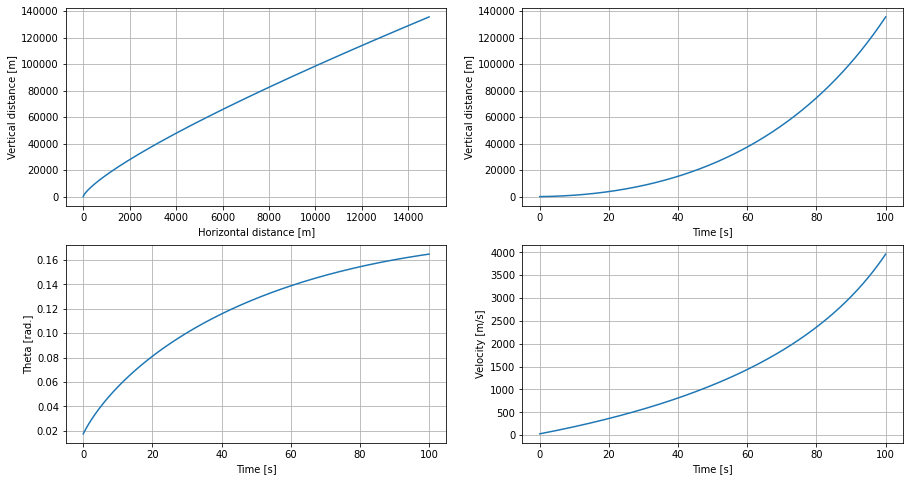

In [38]:
plt.figure(figsize=(15,8));

plt.subplot(2,2,1);plt.plot(xa,ha);plt.grid();plt.xlabel("Horizontal distance [m]");plt.ylabel("Vertical distance [m]");
plt.subplot(2,2,2);plt.plot(ta,ha);plt.grid();plt.xlabel("Time [s]");plt.ylabel("Vertical distance [m]");
plt.subplot(2,2,3);plt.plot(ta,thetaa);plt.grid();plt.xlabel("Time [s]");plt.ylabel("Theta [rad.]");
plt.subplot(2,2,4);plt.plot(ta,ua);plt.grid();plt.xlabel("Time [s]");plt.ylabel("Velocity [m/s]");


# Q1. (b)
## - Only acceleration due to gravity (g) varies (and D = 0):
## - with height (h): g = g0 [Re/(Re + h)]2, where, Re is the earth’s radius = 6,400 km.

In [39]:
[xb,hb,ub,tb,thetab,Dragb,Gb] = trajectory(0,1,0.01)

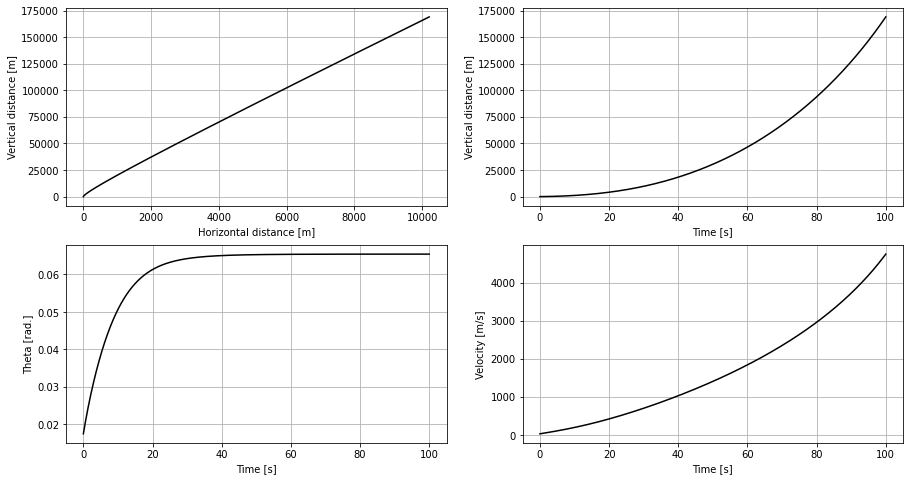

In [40]:
plt.figure(figsize=(15,8));

plt.subplot(2,2,1);plt.plot(xb,hb,"-k");plt.grid();plt.xlabel("Horizontal distance [m]");plt.ylabel("Vertical distance [m]");
plt.subplot(2,2,2);plt.plot(tb,hb,"-k");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Vertical distance [m]");
plt.subplot(2,2,3);plt.plot(tb,thetab,"-k");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Theta [rad.]");
plt.subplot(2,2,4);plt.plot(tb,ub,"-k");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Velocity [m/s]");

# Q1. (c)
##  Only drag (D) varies (and g = g0): with ambient gas density (ρ) and rocket velocity (u): D = CD(1/2)ρu2Af , where, CD is the coefficient of drag = 0.1 (assumed constant), Af is the frontal cross-sectional area of the rocket = 1 m2. ρ(h) = 1.2exp 

In [41]:
[xc,hc,uc,tc,thetac,Dragc,Gc] = trajectory(1,0,0.01)

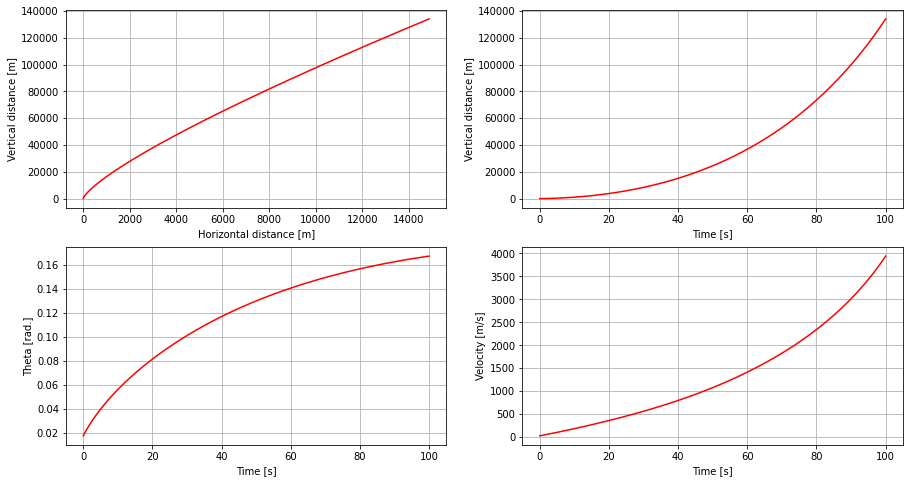

In [42]:
plt.figure(figsize=(15,8));

plt.subplot(2,2,1);plt.plot(xc,hc,"-r");plt.grid();plt.xlabel("Horizontal distance [m]");plt.ylabel("Vertical distance [m]");
plt.subplot(2,2,2);plt.plot(tc,hc,"-r");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Vertical distance [m]");
plt.subplot(2,2,3);plt.plot(tc,thetac,"-r");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Theta [rad.]");
plt.subplot(2,2,4);plt.plot(tc,uc,"-r");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Velocity [m/s]");

# Q1. (d)
##  Both g and D varies: as given in (b) and (c), respectively.

In [43]:
[xd,hd,ud,td,thetad,Dragd,Gd] = trajectory(1,1,0.01)

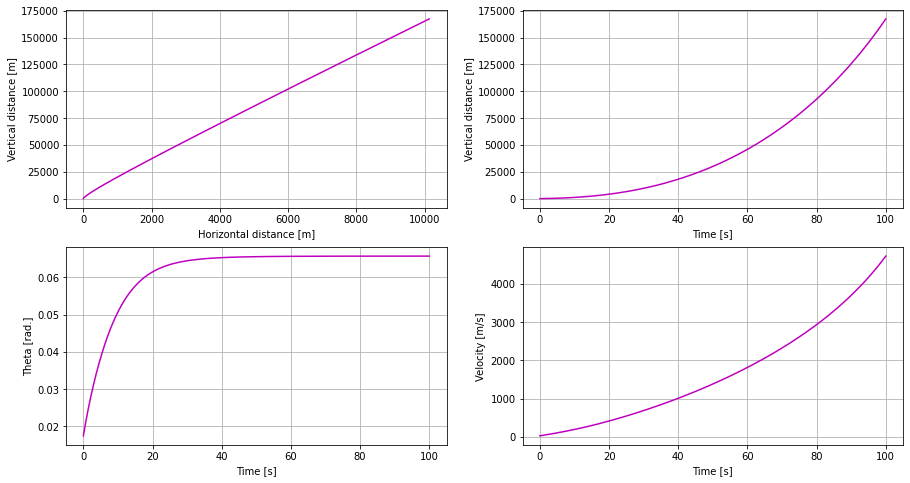

In [44]:
plt.figure(figsize=(15,8));

plt.subplot(2,2,1);plt.plot(xd,hd,"-m");plt.grid();plt.xlabel("Horizontal distance [m]");plt.ylabel("Vertical distance [m]");
plt.subplot(2,2,2);plt.plot(td,hd,"-m");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Vertical distance [m]");
plt.subplot(2,2,3);plt.plot(td,thetad,"-m");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Theta [rad.]");
plt.subplot(2,2,4);plt.plot(td,ud,"-m");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Velocity [m/s]");

# Data Comparison

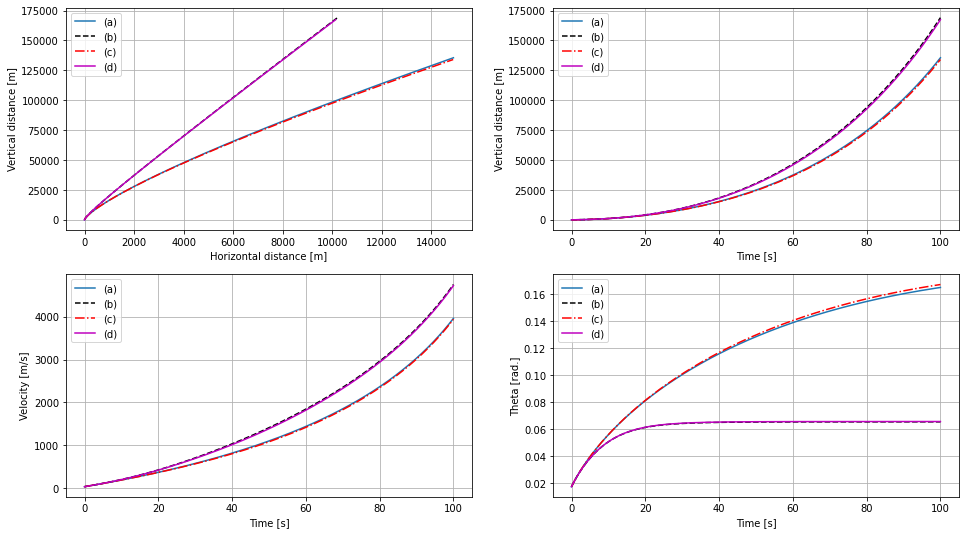

In [47]:
plt.figure(figsize=(16,9));
plt.subplot(2,2,1);
plt.grid();
plt.xlabel("Horizontal distance [m]");plt.ylabel("Vertical distance [m]");
plt.plot(xa,ha,"-")
plt.plot(xb,hb,"--k")
plt.plot(xc,hc,"-.r")
plt.plot(xd,hd,"-m");
plt.legend(["(a)","(b)","(c)","(d)"]);

plt.subplot(2,2,2);
plt.grid();
plt.xlabel("Time [s]");plt.ylabel("Vertical distance [m]");
plt.plot(ta,ha,"-")
plt.plot(tb,hb,"--k")
plt.plot(tc,hc,"-.r")
plt.plot(td,hd,"-m");
plt.legend(["(a)","(b)","(c)","(d)"]);

plt.subplot(2,2,3);
plt.grid();
plt.xlabel("Time [s]");plt.ylabel("Velocity [m/s]");
plt.plot(ta,ua,"-")
plt.plot(tb,ub,"--k")
plt.plot(tc,uc,"-.r")
plt.plot(td,ud,"-m")
plt.legend(["(a)","(b)","(c)","(d)"]);

plt.subplot(2,2,4);
plt.grid();
plt.xlabel("Time [s]");plt.ylabel("Theta [rad.]");
plt.plot(ta,thetaa,"-")
plt.plot(tb,thetab,"--k")
plt.plot(tc,thetac,"-.r")
plt.plot(td,thetad,"-m")
plt.legend(["(a)","(b)","(c)","(d)"]);

# Drag and Gravity Graph

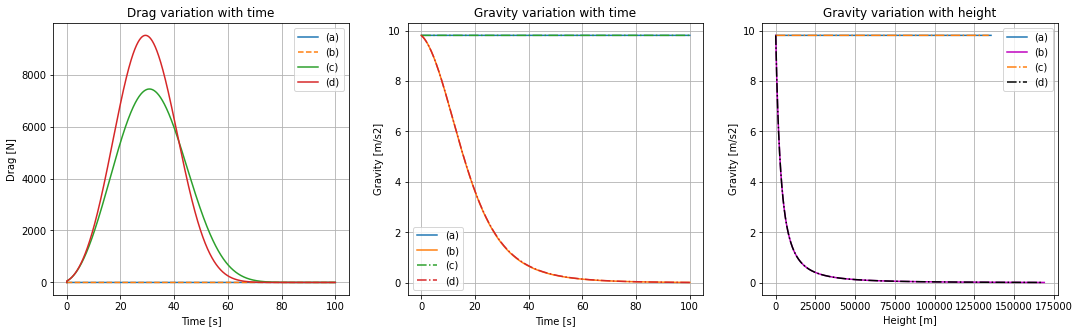

In [57]:
plt.figure(figsize=(18,5));

plt.subplot(1,3,1);
plt.title("Drag variation with time");
plt.grid();
plt.xlabel("Time [s]");plt.ylabel("Drag [N]");
plt.plot(ta,Draga)
plt.plot(tb,Dragb,"--")
plt.plot(tc,Dragc)
plt.plot(td,Dragd);
plt.legend(["(a)","(b)","(c)","(d)"]);

plt.subplot(1,3,2);
plt.title("Gravity variation with time");
plt.grid();
plt.xlabel("Time [s]");plt.ylabel("Gravity [m/s2]");
plt.plot(ta,Ga,"-")
plt.plot(tb,Gb,"-")
plt.plot(tc,Gc,"-.")
plt.plot(td,Gd,"-.");
plt.legend(["(a)","(b)","(c)","(d)"]);

plt.subplot(1,3,3);
plt.title("Gravity variation with height");
plt.grid();
plt.xlabel("Height [m]");plt.ylabel("Gravity [m/s2]");
plt.plot(ha,Ga,"-")
plt.plot(hb,Gb,"-m")
plt.plot(hc,Gc,"-.")
plt.plot(hd,Gd,"-.k");
plt.legend(["(a)","(b)","(c)","(d)"]);


# Burnout Data

In [49]:
BurnOut_data = pd.DataFrame({
    "Q1" : ("(a)","(b)","(c)","(d)"),
    "Burnout Height [m]" : (ha[-1],hb[-1],hc[-1],hd[-1]),
    "Burnout Velocity [m/s]" : (ua[-1],ub[-1],uc[-1],ud[-1]),
    "Burnout Theta [rad]" : (thetaa[-1],thetab[-1],thetac[-1],thetad[-1])
})

In [50]:
BurnOut_data.set_index("Q1",inplace=True)
BurnOut_data

,Burnout Height [m],Burnout Velocity [m/s],Burnout Theta [rad]
Q1,,,
(a),135537.853062,3961.620965,0.164845
(b),169076.336995,4751.342753,0.065435
(c),134064.090122,3939.653236,0.167024
(d),167381.419869,4726.648581,0.065674
